# Question 1

### a) Extract the source content (excluding any tags) from the website (https://en.wikipedia.org/wiki/Web_mining).

**Printing first 200 words from the document for output clarity**

In [23]:
import re
from bs4 import BeautifulSoup
from urllib import request
from nltk.corpus import stopwords
from nltk import word_tokenize

url = "https://en.wikipedia.org/wiki/Web_mining"
html = request.urlopen(url).read().decode('utf8')
raw = BeautifulSoup(html, 'html.parser').get_text()

#Printing the first 200 words of the document to avoid huge output size. 
w = word_tokenize(raw)
for i in range(200):
    print(w[i], end =" ")

Web mining - Wikipedia Web mining From Wikipedia , the free encyclopedia Jump to navigation Jump to search This article may require cleanup to meet Wikipedia 's quality standards . No cleanup reason has been specified . Please help improve this article if you can . ( June 2009 ) ( Learn how and when to remove this template message ) Web mining is the application of data mining techniques to discover patterns from the World Wide Web . As the name proposes , this is information gathered by mining the web . It makes utilization of automated apparatuses to reveal and extricate data from servers and web2 reports , and it permits organizations to get to both organized and unstructured information from browser activities , server logs , website and link structure , page content and different sources . The goal of Web structure mining is to generate structural summary about the Web site and Web page . Technically , Web content mining mainly focuses on the structure of inner-document , while We

### b) Display the total number of terms and term frequency of each term present in them after applying stop word removal

In [24]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import itertools
stop_words = stopwords.words('english')

word_tokens = word_tokenize(raw)

filtered_words = [w for w in word_tokens if not w in stop_words]

print("Count of filtered_words =", len(filtered_words))
print("Term frequency:-")
filtered_set = set(filtered_words)
freq = []
for w in filtered_set:
    freq.append(filtered_words.count(w))
freq
res = dict(zip(filtered_set,freq))

#Printing 10 term frequencies

out = dict(itertools.islice(res.items(), 10))
out

Count of filtered_words = 2993
Term frequency:-


{'See': 2,
 'make': 3,
 'Extraction': 1,
 'No': 2,
 'First': 1,
 'Bauknecht': 1,
 '’': 1,
 'would': 1,
 'NLP': 1,
 '2013': 1}

### c) Remove all the special characters/symbols present in the content by adding those characters as stopwords in the existing stopword list.

In [25]:
stop_words.append('.')
stop_words.append(')')
stop_words.append('(')
stop_words.append(';')
stop_words.append(',')
stop_words.append('–')
stop_words.append('[')
stop_words.append(']')
stop_words.append(':')
stop_words.append('-')
stop_words.append('^')
stop_words.append('=')
stop_words.append('+')
stop_words.append('*')
stop_words.append('~')
stop_words.append('`')
stop_words.append('<')
stop_words.append('>')
stop_words.append('!')
stop_words.append('_')
stop_words.append('#')
stop_words.append('@')
stop_words.append('%')

filteredSpecialChar = [w for w in word_tokens if not w in stop_words]
for i in range(50):
    print(filteredSpecialChar[i])

Web
mining
Wikipedia
Web
mining
From
Wikipedia
free
encyclopedia
Jump
navigation
Jump
search
This
article
may
require
cleanup
meet
Wikipedia
's
quality
standards
No
cleanup
reason
specified
Please
help
improve
article
June
2009
Learn
remove
template
message
Web
mining
application
data
mining
techniques
discover
patterns
World
Wide
Web
As
name


### d) Also, apply stemming (don’t use porter stemmer) and lemmatization to the same document and display the number of terms along with their corresponding stemmed as well as lemmatized words present in them using Pandas dataframe as per the format given below:

In [26]:
from nltk.stem import SnowballStemmer 
from nltk.stem import WordNetLemmatizer
import pandas as pd

ss = SnowballStemmer("english",)
lemmatizer = WordNetLemmatizer() 
stemmed = []
lemmatized = [] 
for w in filtered_set:
    stemmed.append(ss.stem(w))
    lemmatized.append(lemmatizer.lemmatize(w))
filtered_list = list(filtered_set)
data = {'Original Term':filtered_list, 'Stemmed Term':stemmed, 'Lemmatized Term': lemmatized} 
df = pd.DataFrame(data) 
df

,Original Term,Stemmed Term,Lemmatized Term
0,See,see,See
1,make,make,make
2,Extraction,extract,Extraction
3,No,no,No
4,First,first,First
5,Bauknecht,bauknecht,Bauknecht
6,’,’,’
7,would,would,would
8,NLP,nlp,NLP
9,2013,2013,2013


### e) Count the total number of stemmed and lemmatized words

In [27]:
stemmed_set = set(stemmed)
lemmatized_set = set(lemmatized)
print("Total number of stemmed words: ", len(stemmed_set))
print("Total number of lemmatized words: ", len(lemmatized_set))

Total number of stemmed words:  945
Total number of lemmatized words:  1147


### f) Display the POS tag (sentence-wise) for all the stopwords (excluding the special character/symbols), which are removed from the content, using pandas dataframe as per the format given below:

**Output appears properly on Jupyter Notebook**

In [28]:
import nltk
from nltk.tokenize import sent_tokenize
sentence_list = sent_tokenize(raw)
major_list_words = []
major_list_postags = []
stop_words2 = stopwords.words('english')

for sentence in sentence_list:
    words = word_tokenize(sentence)
    tagged = nltk.pos_tag(words)
    words_in_sentence = []
    pos_tags_of_words = []
    for w in tagged:
        if(w[0] in stop_words2):
            words_in_sentence.append(w[0])
            pos_tags_of_words.append(w[1])
    major_list_words.append(words_in_sentence)
    major_list_postags.append(pos_tags_of_words)
major_list_words
major_list_postags
data2 = {'Sentence':sentence_list, 'Stopwords':major_list_words, 'Postags': major_list_postags} 
df = pd.DataFrame(data2) 
df

,Sentence,Stopwords,Postags
0,\n\n\n\n\nWeb mining - Wikipedia\n\n\n\n\n\n\n...,"[the, to, to, to]","[DT, TO, TO, TO]"
1,No cleanup reason has been specified.,"[has, been]","[VBZ, VBN]"
2,Please help improve this article if you can.,"[this, if, you, can]","[DT, IN, PRP, MD]"
3,(June 2009) (Learn how and when to remove this...,"[how, and, when, to, this, is, the, of, to, fr...","[WRB, CC, WRB, TO, DT, VBZ, DT, IN, TO, IN, DT]"
4,"As the name proposes, this is information gath...","[the, this, is, by, the]","[DT, DT, VBZ, IN, DT]"
5,It makes utilization of automated apparatuses ...,"[of, to, and, from, and, and, it, to, to, both...","[IN, TO, CC, IN, CC, CC, PRP, TO, TO, DT, CC, ..."
6,The goal of Web structure mining is to generat...,"[of, is, to, about, the, and]","[IN, VBZ, TO, IN, DT, CC]"
7,"Technically, Web content mining mainly focuses...","[on, the, of, while, to, the, of, the, at, the]","[IN, DT, IN, IN, TO, DT, IN, DT, IN, DT]"
8,"Based on the topology of the hyperlinks, Web s...","[on, the, of, the, will, the, and, the, such, ...","[IN, DT, IN, DT, MD, DT, CC, DT, JJ, IN, DT, C..."
9,Web structure mining can also have another dir...,"[can, have, the, of, itself]","[MD, VB, DT, IN, PRP]"


# Question 2

### Extract the contents (excluding any tags) from two websites (https://en.wikipedia.org/wiki/Web_mining & https://en.wikipedia.org/wiki/Data_mining).

In [29]:
url1 = "https://en.wikipedia.org/wiki/Web_mining"
url2 = "https://en.wikipedia.org/wiki/Data_mining"
html1 = request.urlopen(url1).read().decode('utf8')
html2 = request.urlopen(url2).read().decode('utf8')
raw1 = BeautifulSoup(html1, 'html.parser').get_text()
raw2 = BeautifulSoup(html2, 'html.parser').get_text()

#Printing the first 200 words of the document to avoid huge output size. 
w1 = word_tokenize(raw1)
w2 = word_tokenize(raw2)
for i in range(200):
    print(w1[i], end =" ")
print("\n")
for i in range(200):
    print(w2[i], end = " ")

Web mining - Wikipedia Web mining From Wikipedia , the free encyclopedia Jump to navigation Jump to search This article may require cleanup to meet Wikipedia 's quality standards . No cleanup reason has been specified . Please help improve this article if you can . ( June 2009 ) ( Learn how and when to remove this template message ) Web mining is the application of data mining techniques to discover patterns from the World Wide Web . As the name proposes , this is information gathered by mining the web . It makes utilization of automated apparatuses to reveal and extricate data from servers and web2 reports , and it permits organizations to get to both organized and unstructured information from browser activities , server logs , website and link structure , page content and different sources . The goal of Web structure mining is to generate structural summary about the Web site and Web page . Technically , Web content mining mainly focuses on the structure of inner-document , while We

### Remove stopwords (including the special characters/symbols) from the contents retrieved from those two URLs and save the contents in two separate .doc file.

In [43]:
stop_words.append("’")
filteredWebMining = [w for w in w1 if not w in stop_words]
filteredDataMining = [w for w in w2 if not w in stop_words]
file1 = open("Web.doc","w", encoding='utf-8')
file2 = open("Data.doc","w",encoding='utf-8')
for w in filteredWebMining:
    file1.write(w+" ")
for w in filteredDataMining:
    file2.write(w+" ")
print("Successfully saved the filtered words into seperate files!")

Successfully saved the filtered words into seperate files!


### Display the Term-Document incidence matrix using Boolean, Bag-of-words and Complete representation (Use pandas dataframe).

**I've shown the first 5 words in the entire set for better output representation**

In [48]:
setWeb = set(filteredWebMining)
setData = set(filteredDataMining)
totalSet = setWeb|setData
totalList = list(totalSet)
listOfWords = ['Document ID']
for i in range(10):
    listOfWords.append(totalList[i])
webdoc =['doc1']
datadoc = ['doc2']
for w in listOfWords:
    if(w == "Document ID"):
        continue
    if (w in w1):
        webdoc.append(1)
    else:
        webdoc.append(0)
    if (w in w2):
        datadoc.append(1)
    else:
        datadoc.append(0)
data = [webdoc,datadoc]
df = pd.DataFrame(data, columns = listOfWords)
print("Boolean Representation")
df

Boolean Representation


,Document ID,Special,controlled,Society,grown,37,miner,World,Commerce,Farming,roughly
0,doc1,0,0,0,0,1,0,1,1,0,0
1,doc2,1,1,1,1,1,1,1,0,1,1


In [49]:
webdoc = ['doc1']
datadoc = ['doc2']
for w in listOfWords:
    if(w == "Document ID"):
        continue
    if (w in w1):
        webdoc.append(w1.count(w))
    else:
        webdoc.append(0)
    if (w in w2):
        datadoc.append(w2.count(w))
    else:
        datadoc.append(0)
data = [webdoc,datadoc]
df = pd.DataFrame(data, columns = listOfWords)
print("Bag Of Words Model")
df

Bag Of Words Model


,Document ID,Special,controlled,Society,grown,37,miner,World,Commerce,Farming,roughly
0,doc1,0,0,0,0,1,0,6,1,0,0
1,doc2,1,1,1,1,1,2,1,0,1,1


In [50]:
webdoc = ['doc1']
datadoc = ['doc2']
for w in listOfWords:
    inWeb = []
    inData = []
    if(w == "Document ID"):
        continue
    if (w in w1):
        for i in range(len(w1)):
            if(w1[i] == w):
                inWeb.append(i)
        webdoc.append(inWeb)
    else:
        webdoc.append(0)
    if (w in w2):
        for i in range(len(w2)):
            if(w2[i] == w):
                inData.append(i)
        datadoc.append(inData)
    else:
        datadoc.append(0)
data = [webdoc,datadoc]
df = pd.DataFrame(data, columns = listOfWords)
print("Complete Representation")
df

Complete Representation


,Document ID,Special,controlled,Society,grown,37,miner,World,Commerce,Farming,roughly
0,doc1,0,0,0,0,[3444],0,"[75, 1753, 1778, 3114, 3148, 3490]",[2496],0,0
1,doc2,[2466],[3597],[3751],[1349],[3536],"[3046, 4037]",[6867],0,[6521],[6680]


### Input a search a query (preferably a sentence) and compare the contents of the both pages with the processed query. Display the similarity result based on highest frequency matching count of the term.

In [111]:
def termFrequency(term, document):
    normalizeDocument = document.lower().split()
    return normalizeDocument.count(term.lower()) / float(len(normalizeDocument))

def inverseDocumentFrequency(term, allDocuments):
    numDocumentsWithThisTerm = 0
    for doc in allDocuments:
        if term.lower() in allDocuments[doc].lower().split():
            numDocumentsWithThisTerm = numDocumentsWithThisTerm + 1
 
    if numDocumentsWithThisTerm > 0:
        return 1.0 + log(float(len(allDocuments)) / numDocumentsWithThisTerm)
    else:
        return 1.0

def cosineSimilarity(query, allDocument):
    for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    result.append(cosine)

cosineSimilarity("What is data mining?", allDocuments)
    
def printResult():
    if (result[0]>result[1]):
        print("Document 1 is more relevant")
    else:
        print("Document 2 is more relevant")

Document 2 is more relevant


# Question 3

### Write a python program to prepare the Word Clouds representation based on the content present in the two document files prepared in Q.No. 2. A sample Word Clouds representation is provided below for reference.

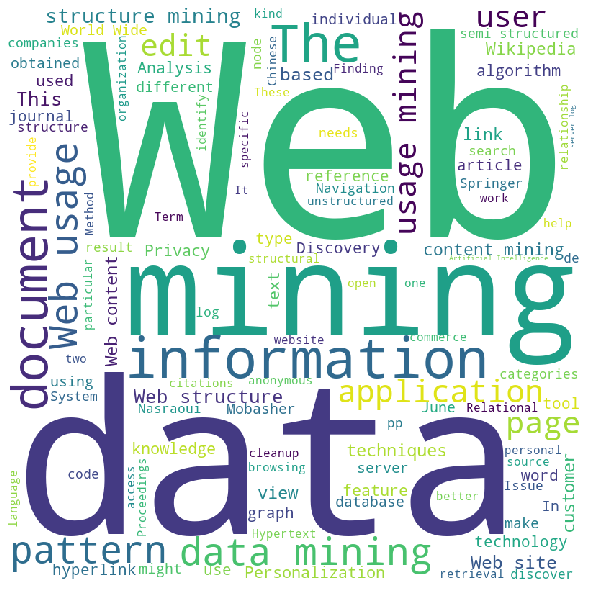

In [98]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

file3 = open("Web.doc",'r', encoding = "utf-8")
words = file3.read()
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

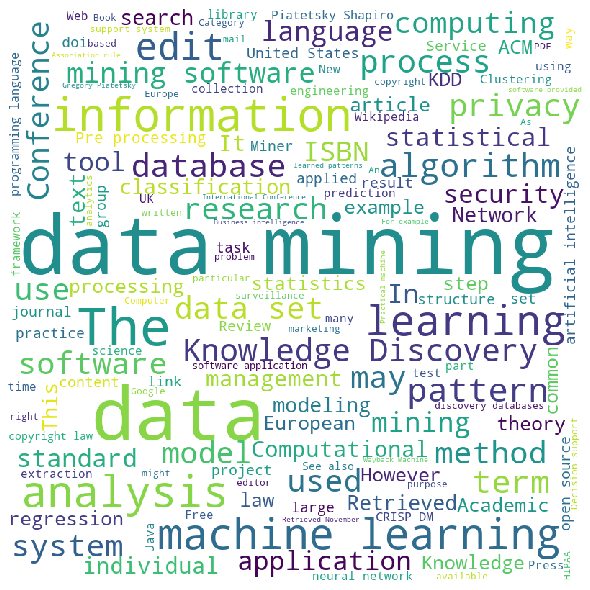

In [99]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

file3 = open("Data.doc",'r', encoding = "utf-8")
words = file3.read()
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Question 4

### Write a python program to show the implementation of sentence paraphrasing through synonyms (retaining semantic meaning) for the following four sentences. Display at least three other paraphrased sentences for each sentence mentioned below.


In [100]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet as wn

def tag(sentence):
 words = word_tokenize(sentence)
 words = pos_tag(words)
 return words

def paraphraseable(tag):
 return tag.startswith('NN') or tag == 'VB' or tag.startswith('JJ')

def pos(tag):
 if tag.startswith('NN'):
  return wn.NOUN
 elif tag.startswith('V'):
  return wn.VERB

def synonyms(word, tag):
    lemma_lists = [ss.lemmas() for ss in wn.synsets(word, pos(tag))]
    lemmas = [lemma.name() for lemma in sum(lemma_lists, [])]
    return set(lemmas)

def synonymIfExists(sentence):
 for (word, t) in tag(sentence):
   if paraphraseable(t):
    syns = synonyms(word, t)
    if syns:
     if len(syns) > 1:
      yield [word, list(syns)]
      continue
   yield [word, []]

def paraphrase(sentence):
 return [x for x in synonymIfExists(sentence)]

s1 = paraphrase("The quick brown fox jumps over the lazy dog")
s2 = paraphrase("Obama and Putin met the previous week")
s3 = paraphrase("At least 12 people were killed in the battle last week")
s4 = paraphrase("I will go home and come back tomorrow")

In [101]:
def parap(arr,j):
    s1 = ""
    
    for i in range(len(arr)):
        if(arr[i][1]==[]):
            wrd=arr[i][0]
        elif(len(arr[i][1])<=j):
            wrd=arr[i][0]
        else:
            wrd=arr[i][1][j]
        
        s1=s1+" "+wrd
    return s1

In [102]:
for i in range(3):
    print(parap(s1,i))

 The fast brownness Fox jumps over the lazy dog
 The agile John_Brown dodger jumps over the slothful domestic_dog
 The flying brown fox jumps over the faineant frank


In [103]:
for i in range(3):
    print(parap(s2,i))

 Obama and Vladimir_Putin met the old workweek
 Obama and Vladimir_Vladimirovich_Putin met the former week
 Obama and Putin met the previous hebdomad


In [104]:
for i in range(3):
    print(parap(s3,i))

 At to_the_lowest_degree 12 masses were killed in the conflict survive workweek
 At least 12 hoi_polloi were killed in the engagement cobbler's_last week
 At least 12 citizenry were killed in the battle stopping_point hebdomad


In [105]:
for i in range(3):
    print(parap(s4,i))

 I will survive menage and fare back tomorrow
 I will kick_the_bucket dwelling and derive back tomorrow
 I will start plate and come_in back tomorrow
